### DAB422 : CAPSTONE PROJECT 2

## Sentiment Analysis

## Project Title - Air Quality and Electric Vehicles: Understanding Public Perception

- **Group Number: 5**

---
**Group Members**

 * Kabir Lawal 0832286

 * Olufunke Taiwo 0825559

 * Ofonime Inyang 0830724

 * Kehinde Felix 0848732

 * Labeebah Mustapha 0832584

In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

In [44]:
# Load  dataset
df = pd.read_csv('survey_data.csv')
df.head()

,Unnamed: 0,Age_Group,Country,City,Primary_Transportation_Mode,EV_Environmental_Benefits,EV_ Adoption_Impact,Encourage_EV_Adoption,EV_Adoption_Sentiment,EV_Switch_Factor,EV_Policy_Satisfaction,Fuel_Restrictions_Support,EV_Incentive,EV_Concern
0,1,25-34,Canada,Windsor,Public Transport,Slightly familiar,Maybe,Strongly Disagree,Very Negative,Lower costs;More charging stations;Government ...,Very Dissatisfied,Yes,"More financial incentives (subsidies, tax brea...",Electricity
1,2,35-44,Canada,Windsor,Gasoline/Diesel Vehicle,Very familiar,Yes,Strongly Agree,Positive,Lower costs;Environmental benefits;Government ...,Dissatisfied,Yes,"More financial incentives (subsidies, tax brea...",Affordablability
2,3,18-24,Canada,Windsor,Public Transport,Slightly familiar,Yes,Neutral,Neutral,Government incentives;,Neutral,Yes,Increased public awareness campaigns;,No pollution and sound pollution
3,4,25-34,Canada,Windsor,Public Transport,Moderately familiar,Maybe,NaN,Neutral,Environmental benefits;,Neutral,Not sure,Improved charging infrastructure;,Cost
4,5,45-49,Canada,Windsor,Gasoline/Diesel Vehicle,Not at all familiar,Maybe,Neutral,Neutral,Lower costs;,Neutral,No,Improved charging infrastructure;,NaN


## 1.2: Frequency Distribution of Categorical Columns


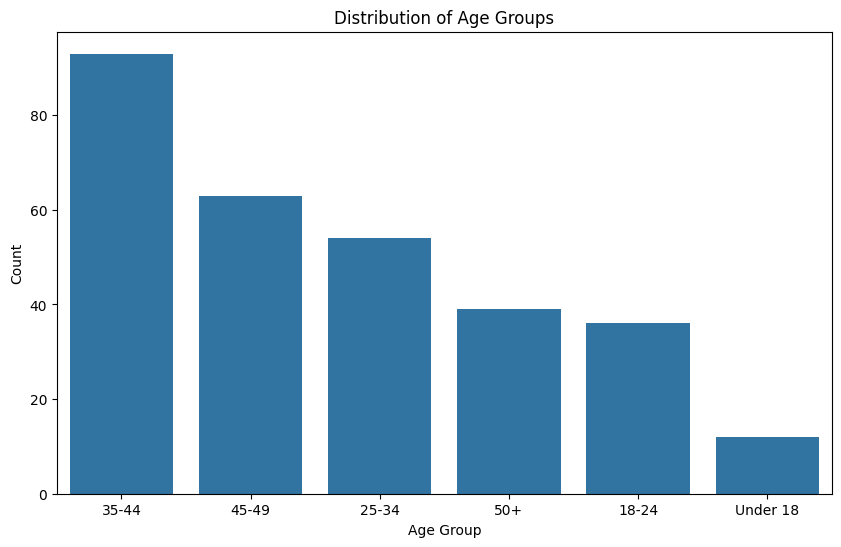

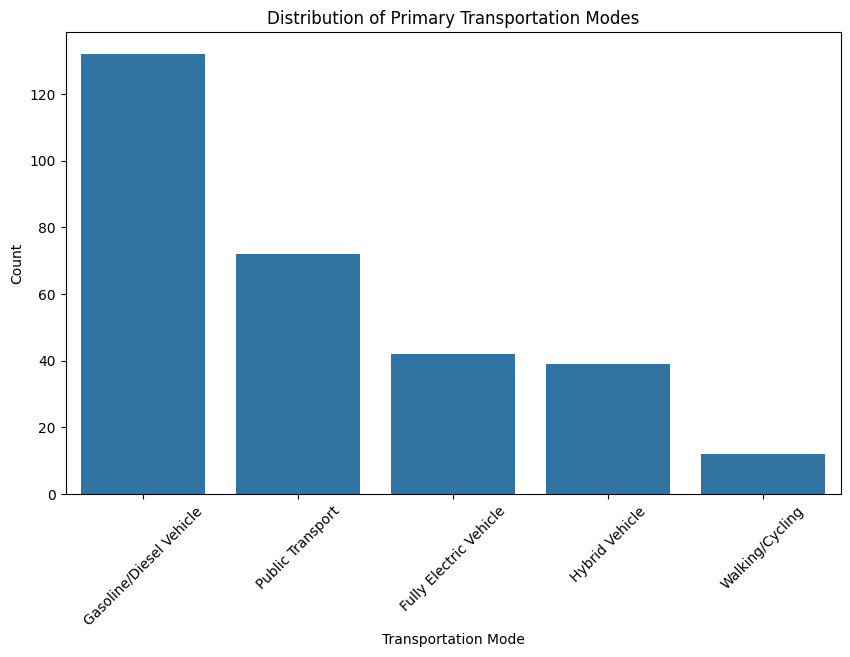

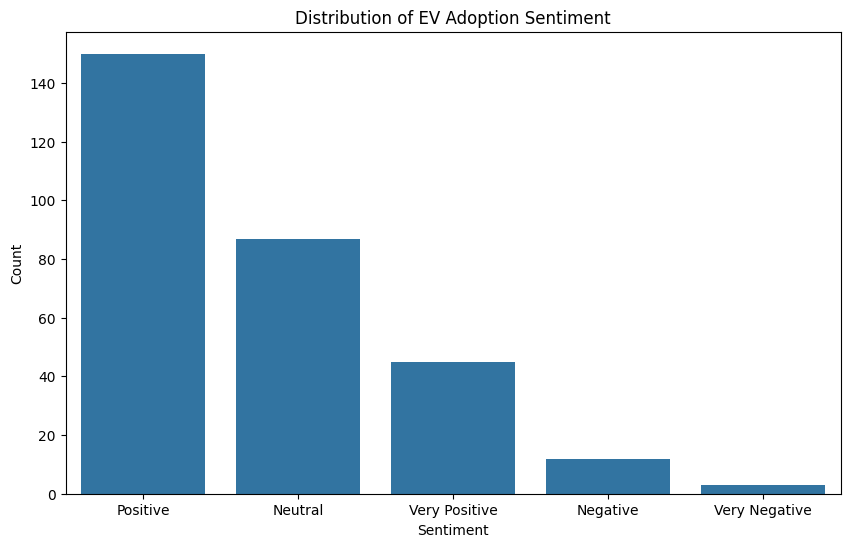

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency distribution of Age_Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', order=df['Age_Group'].value_counts().index)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Frequency distribution of Primary_Transportation_Mode
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Primary_Transportation_Mode', order=df['Primary_Transportation_Mode'].value_counts().index)
plt.title('Distribution of Primary Transportation Modes')
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Frequency distribution of EV_Adoption_Sentiment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EV_Adoption_Sentiment', order=df['EV_Adoption_Sentiment'].value_counts().index)
plt.title('Distribution of EV Adoption Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kabir\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


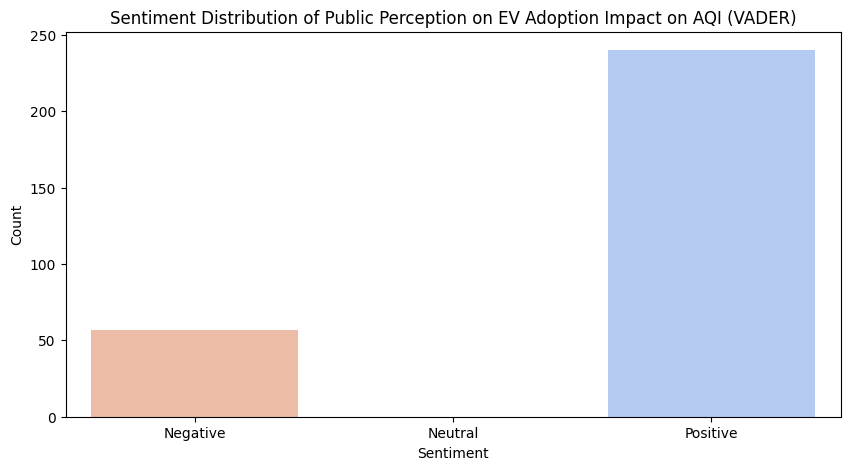

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud

# Download VADER if needed
nltk.download('vader_lexicon')

# Relevant columns for sentiment analysis
sentiment_columns = [
    "EV_Switch_Factor", "EV_Policy_Satisfaction", "Fuel_Restrictions_Support", 
    "EV_Incentive", "EV_Concern"
]

# Fill missing values with empty strings
df[sentiment_columns] = df[sentiment_columns].fillna("")

# Combine all selected text responses per row
df["Combined_Text"] = df[sentiment_columns].agg(" ".join, axis=1)

### 1. VADER Sentiment Analysis ###
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    return "Positive" if score > 0.05 else "Negative" if score < -0.05 else "Neutral"

df["VADER_Sentiment"] = df["Combined_Text"].apply(get_vader_sentiment)

### 2. TextBlob Sentiment Analysis ###
def get_textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    return "Positive" if score > 0.05 else "Negative" if score < -0.05 else "Neutral"

df["TextBlob_Sentiment"] = df["Combined_Text"].apply(get_textblob_sentiment)

### 3. Visualization: Sentiment Distribution ###
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, 
    x="VADER_Sentiment", 
    order=["Negative", "Neutral", "Positive"], 
    palette="coolwarm",
    hue="VADER_Sentiment",
    legend=False
)
plt.title("Sentiment Distribution of Public Perception on EV Adoption Impact on AQI (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()



### **Insight from Sentiment Analysis on EV Adoption (VADER)**
1. **Predominantly Positive Sentiment:**  
   - The majority of public opinions on EV adoption are positive, as seen in the significantly higher count of positive sentiments.  
2. **Limited Negative Sentiment:**  
   - Negative sentiments exist but are relatively low, indicating that only a small portion of the public holds unfavorable views on EV adoption.  
3. **Absence of Neutral Sentiments:**  
   - The lack of neutral sentiment suggests that most opinions are strongly polarized rather than neutral or undecided.  

### **Recommendations**
- **Leverage Positive Sentiment for Advocacy:**  
  - Use the strong positive perception to promote EV adoption campaigns, government incentives, and brand marketing.  
- **Address Concerns from Negative Sentiments:**  
  - Conduct further analysis to understand the reasons behind negative sentiments and mitigate public concerns (e.g., range anxiety, cost, charging infrastructure).  
- **Encourage Neutral Engagement:**  
  - Investigate why there are no neutral responses and consider strategies to educate and involve those who may not yet have formed strong opinions.  



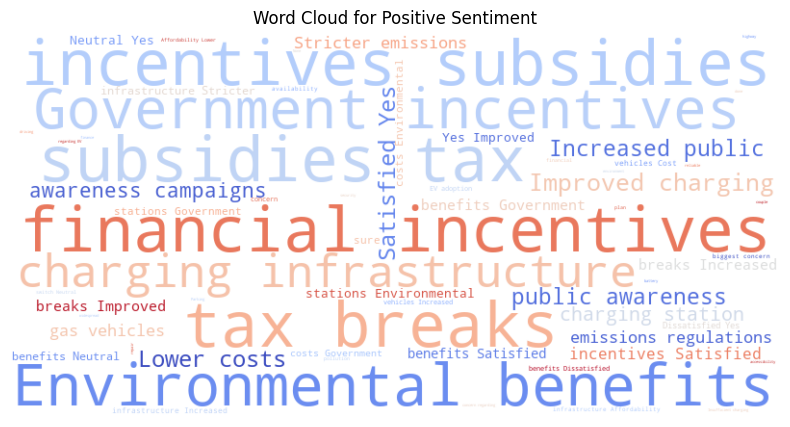

In [40]:

### 4. Generate Word Clouds for Each Sentiment Category ###
def generate_wordcloud(sentiment_category, sentiment_column="VADER_Sentiment"):
    text = " ".join(df[df[sentiment_column] == sentiment_category]["Combined_Text"])
    
    if text.strip():  # Avoid errors for empty text
        wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for {sentiment_category} Sentiment")
        plt.show()

# Generate word clouds for each sentiment category
for sentiment in ["Positive"]:
    generate_wordcloud(sentiment)



### **Insight from Word Cloud for Positive Sentiment**
1. **Strong Focus on Financial Incentives:**  
   - Key terms such as "financial incentives," "tax breaks," and "subsidies" indicate that monetary benefits are a major driver of positive sentiment.  
2. **Government Support is Critical:**  
   - Words like "government," "subsidies," and "public awareness" highlight the role of policy and regulation in encouraging EV adoption.  
3. **Environmental Benefits Recognized:**  
   - The presence of "environmental benefits" and "emissions regulations" suggests that people view EVs as a positive step toward sustainability.  
4. **Infrastructure and Charging Concerns Addressed:**  
   - Words like "charging infrastructure" and "improved charging" suggest that enhancements in charging stations contribute to the positive perception.  

### **Recommendations**
- **Expand Financial Incentives:**  
  - Continue promoting subsidies and tax benefits to encourage EV adoption.  
- **Increase Public Awareness:**  
  - Highlight government initiatives and environmental benefits in marketing campaigns.  
- **Enhance Charging Infrastructure:**  
  - Invest in expanding charging stations to further boost public confidence in EV usability.  


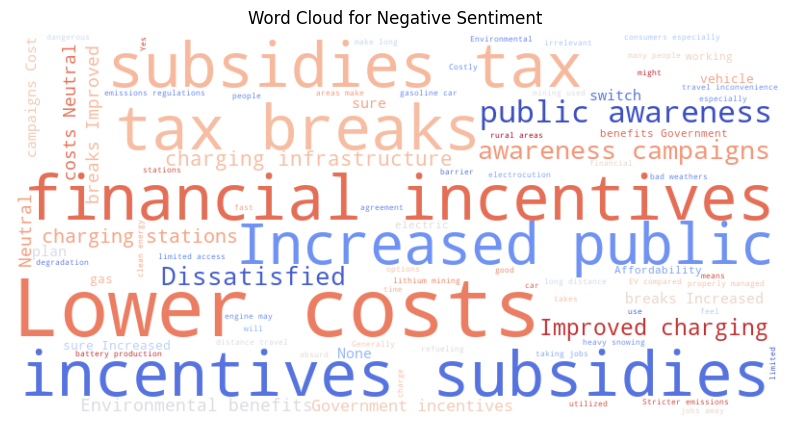

In [39]:
# Generate word clouds for each sentiment category
for sentiment in [ "Negative"]:
    generate_wordcloud(sentiment)

### **Comparison of Positive vs. Negative Sentiment Word Clouds**

#### **Key Observations:**
1. **Financial Incentives & Tax Breaks:**
   - **Positive Sentiment:** People appreciate financial incentives, tax breaks, and subsidies.  
   - **Negative Sentiment:** There is dissatisfaction regarding the financial burden, possibly due to perceived inadequacy or unfair distribution.

2. **Government & Public Awareness:**
   - **Positive Sentiment:** Government incentives and public awareness campaigns are viewed as beneficial.  
   - **Negative Sentiment:** There is skepticism or dissatisfaction about how effectively these policies are implemented.

3. **Infrastructure & Charging:**
   - **Positive Sentiment:** "Improved charging" and "charging infrastructure" suggest advancements are appreciated.  
   - **Negative Sentiment:** Complaints about "limited access" and "bad weather" indicate concerns about reliability and convenience.

4. **Costs & Affordability:**
   - **Positive Sentiment:** "Lower costs" appears but in a less dominant way.  
   - **Negative Sentiment:** "Lower costs" is more prominent, suggesting concerns about the overall affordability of EVs.

### **Actionable Insights:**
- **Improve Financial Incentives:** Ensure they are equitable and clearly communicated to avoid dissatisfaction.
- **Address Infrastructure Concerns:** Expand charging networks, especially in rural areas, and improve reliability.
- **Enhance Public Awareness Campaigns:** Tackle misinformation or misconceptions to build trust in EV adoption.



### **General Conclusion: Exploring the Impact of EV Adoption on Air Quality Improvement**  

As part of our project on **exploring the impact of EV adoption on AQI improvement**, we conducted a sentiment analysis to assess public perception and concerns regarding key themes that influence EV adoption. Our findings reveal valuable insights into the sentiment surrounding policies, incentives, and infrastructure that drive the transition to electric vehicles and, ultimately, their impact on air quality.  

#### **Key Sentiment Insights in Relation to AQI Improvement**  

1. **Financial Incentives & Subsidies**  
   - **Positive Sentiment**: Many respondents recognize that government incentives help reduce EV costs, making adoption more feasible and potentially leading to lower emissions.  
   - **Negative Sentiment**: Some skepticism exists regarding the sustainability and fairness of subsidies, raising concerns about whether they effectively lead to significant air quality improvements.  

2. **Tax Breaks**  
   - **Positive Sentiment**: Supporters see tax incentives as a critical tool in encouraging EV purchases, indirectly contributing to reduced emissions.  
   - **Negative Sentiment**: Critics argue that tax breaks primarily benefit higher-income groups, limiting widespread EV adoption and thus having a limited impact on AQI.  

3. **Public Awareness**  
   - **Neutral to Negative Sentiment**: Many respondents feel that awareness campaigns about EV benefits and their role in improving air quality are insufficient. Misconceptions about EV efficiency and environmental benefits persist.  

4. **Charging Infrastructure**  
   - **Negative Sentiment**: The lack of accessible and fast charging stations remains a major barrier, hindering large-scale EV adoption and delaying potential air quality improvements.  

5. **Lower Costs & Affordability**  
   - **Positive Sentiment**: Increased affordability of EVs is seen as a game-changer for mass adoption, which would significantly contribute to AQI improvements.  
   - **Negative Sentiment**: Many still perceive EVs as expensive, limiting their adoption and slowing the transition away from fossil-fuel vehicles.  

6. **Government Policies**  
   - **Mixed Sentiment**: While many appreciate regulations supporting EVs, concerns exist over inconsistent policies and a lack of long-term planning to ensure EV adoption translates to measurable AQI improvements.  

#### **Conclusion & Recommendations**  

 **Stronger financial support and clearer policies** are needed to enhance EV adoption and ensure that its impact on air quality is maximized.  

 **Investment in charging infrastructure** must increase to remove a key adoption barrier and accelerate the shift to clean transportation.  

 **Enhanced public awareness campaigns** should focus on educating consumers about EV benefits and their direct contribution to air quality improvement.  

 **Affordable EV options** will drive mass adoption, leading to a significant reduction in vehicle emissions and better air quality outcomes.  

 **Policy consistency and long-term planning** are crucial to ensuring that incentives and infrastructure development align with AQI improvement goals.  

### **Final Thought**  
While EV adoption has the potential to greatly improve air quality, overcoming affordability, infrastructure, and awareness barriers is essential for realizing these benefits on a large scale. Addressing these concerns will help accelerate EV adoption and contribute to a cleaner, healthier environment.  



## References
- https://scikit-learn.org/stable/
- Mueller, A. (2011). WordCloud: A little word cloud generator in Python. Retrieved from https://github.com/amueller/word_cloud
-  https://huggingface.co/docs/transformers/
-  Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python. O'Reilly Media. Retrieved from https://www.nltk.org/howto/sentiment.html